## Session5 - playground3 (Optional)

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
from mnist_loader import MNISTVectorLoader
mnist_vector_loader = MNISTVectorLoader(42)
X, y = mnist_vector_loader.samples(1000)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Here, we will create a dataset with a certain amount of labelling errors.

ここでは、一部のラベル付けが間違えているデータセットを作成します。

In [17]:
# Error ratio / エラー率
error_ratio = 0.05

In [18]:
# training set with errors / エラーを含めているトレーニングセット
number_errors = int(error_ratio * y_train.shape[0])
indices = np.random.permutation(y_train.shape[0])[:number_errors] # randomly select number_errors samples to modify
y_train_error = y_train.copy()
y_train_error[indices] = y_train_error[indices] + 1
y_train_error[y_train_error>9] = 0
print("Wrong labels in training set: {} / {}".format(number_errors, y_train.shape[0]))

Wrong labels in training set: 37 / 750


In [19]:
# testing set with errors / エラーを含めているテストセット
number_errors = int(error_ratio * y_test.shape[0])
indices = np.random.permutation(y_test.shape[0])[:number_errors]
y_test_error = y_test.copy()
y_test_error[indices] = y_test_error[indices] + 1
y_test_error[y_test_error>9] = 0
print("Wrong labels in testing set: {} / {}".format(number_errors, y_test.shape[0]))

Wrong labels in testing set: 12 / 250


## OPTIONAL 1
-  Train a classifier with the dataset containing labelling error `X_train, y_train_error`.


- ラベル付けエラーを含むデータセット`X_train、y_train_error`で分類器をトレーニングしてください。

In [20]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter = 1000, tol =  1e-3)

sgd_classifier.fit(X_train, y_train_error); 

## OPTIONAL 2
Test the performance of the trained classifier with:
- the test set `X_test, y_test`
- the testing set containing labelling error `X_test, y_test_error`


トレーニングされた分類器のパフォーマンスを試してください。
- 元のテストセット`X_test、y_test`を使って
- ラベル付けエラーを含むテストセット `X_test、y_test_error`を使って

In [21]:
# y_test
y_test_pred = sgd_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_test_pred)
print(CM)

[[24  0  0  1  0  1  0  0  0  0]
 [ 0 27  2  0  0  0  0  0  0  2]
 [ 0  0 27  2  0  0  3  0  1  0]
 [ 0  0  0 15  0  2  0  0  0  1]
 [ 0  0  0  0 17  1  1  1  1  0]
 [ 0  0  0  1  1 20  1  0  2  1]
 [ 0  0  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  0  0 22  1  2]
 [ 0  1  0  1  0  1  1  1 18  1]
 [ 1  0  0  1  1  0  0  3  1 18]]


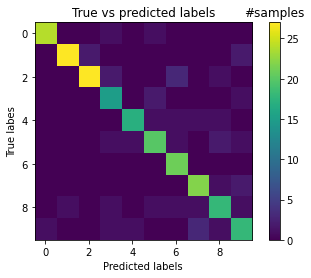

In [22]:
plt.imshow(CM)
plt.xlabel("Predicted labels")
plt.ylabel("True labes")
plt.title("True vs predicted labels")
cbar = plt.colorbar()
cbar.ax.set_title("#samples", rotation=0);

In [23]:
P = np.diag(CM) / np.sum(CM, axis = 0)
R = np.diag(CM) / np.sum(CM, axis = 1)
F = 2.0 * R * P / (R + P) # 1 / ((1/P + 1/R) / 2 ) = 2 * R * P / (R + P)
for i in range(3):
    print("Class '{}' : P = {:.02f} R = {:.02f}  F = {:.02f}".format(i, P[i], R[i], F[i]))

Class '0' : P = 0.96 R = 0.92  F = 0.94
Class '1' : P = 0.96 R = 0.87  F = 0.92
Class '2' : P = 0.93 R = 0.82  F = 0.87


In [24]:
# y_test
y_test_pred = sgd_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test_error, y_test_pred)
print(CM)

[[24  0  0  1  0  1  0  0  0  2]
 [ 0 25  2  0  0  0  0  0  0  2]
 [ 0  2 25  2  0  0  3  0  1  0]
 [ 0  0  2 15  0  2  0  0  0  1]
 [ 0  0  0  0 16  1  1  1  1  0]
 [ 0  0  0  1  2 18  1  0  2  1]
 [ 0  0  0  0  0  2 20  0  0  0]
 [ 0  0  0  0  0  0  1 20  1  2]
 [ 0  1  0  1  0  1  1  3 18  1]
 [ 1  0  0  1  1  0  0  3  1 16]]


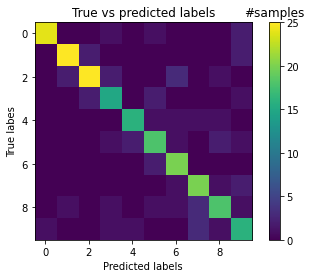

In [25]:
plt.imshow(CM)
plt.xlabel("Predicted labels")
plt.ylabel("True labes")
plt.title("True vs predicted labels")
cbar = plt.colorbar()
cbar.ax.set_title("#samples", rotation=0);

In [26]:
P = np.diag(CM) / np.sum(CM, axis = 0)
R = np.diag(CM) / np.sum(CM, axis = 1)
F = 2.0 * R * P / (R + P) # 1 / ((1/P + 1/R) / 2 ) = 2 * R * P / (R + P)
for i in range(3):
    print("Class '{}' : P = {:.02f} R = {:.02f}  F = {:.02f}".format(i, P[i], R[i], F[i]))

Class '0' : P = 0.96 R = 0.86  F = 0.91
Class '1' : P = 0.89 R = 0.86  F = 0.88
Class '2' : P = 0.86 R = 0.76  F = 0.81


- Try changing the values of `error_ratio` to see how it influences the performance


- `error_ratio`の値を変更して、パフォーマンスにどのように影響するかを確認してください

In [27]:
# Error ratio / エラー率
error_ratio = 0.1

In [28]:
# training set with errors / エラーを含めているトレーニングセット
number_errors = int(error_ratio * y_train.shape[0])
indices = np.random.permutation(y_train.shape[0])[:number_errors] # randomly select number_errors samples to modify
y_train_error = y_train.copy()
y_train_error[indices] = y_train_error[indices] + 1
y_train_error[y_train_error>9] = 0
print("Wrong labels in training set: {} / {}".format(number_errors, y_train.shape[0]))

Wrong labels in training set: 75 / 750


In [29]:
# testing set with errors / エラーを含めているテストセット
number_errors = int(error_ratio * y_test.shape[0])
indices = np.random.permutation(y_test.shape[0])[:number_errors]
y_test_error = y_test.copy()
y_test_error[indices] = y_test_error[indices] + 1
y_test_error[y_test_error>9] = 0
print("Wrong labels in testing set: {} / {}".format(number_errors, y_test.shape[0]))

Wrong labels in testing set: 25 / 250


In [30]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter = 1000, tol =  1e-3)

sgd_classifier.fit(X_train, y_train_error); 

In [31]:
# y_test
y_test_pred = sgd_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test_error, y_test_pred)
print(CM)

[[20  3  0  0  0  0  0  0  0  2]
 [ 2 23  5  0  0  0  0  0  1  0]
 [ 0  3 23  1  0  0  1  1  1  1]
 [ 0  0  3 15  0  0  2  0  1  1]
 [ 0  0  0  1 13  1  0  2  0  4]
 [ 0  0  0  0  3 14  3  0  1  1]
 [ 0  0  1  0  1  4 17  1  0  0]
 [ 3  0  0  0  0  0  1 20  0  1]
 [ 0  1  0  0  0  0  2  1 19  2]
 [ 2  0  0  1  1  0  0  2  1 17]]


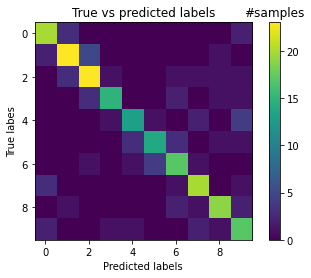

In [32]:
plt.imshow(CM)
plt.xlabel("Predicted labels")
plt.ylabel("True labes")
plt.title("True vs predicted labels")
cbar = plt.colorbar()
cbar.ax.set_title("#samples", rotation=0);

In [33]:
P = np.diag(CM) / np.sum(CM, axis = 0)
R = np.diag(CM) / np.sum(CM, axis = 1)
F = 2.0 * R * P / (R + P) # 1 / ((1/P + 1/R) / 2 ) = 2 * R * P / (R + P)
for i in range(3):
    print("Class '{}' : P = {:.02f} R = {:.02f}  F = {:.02f}".format(i, P[i], R[i], F[i]))

Class '0' : P = 0.74 R = 0.80  F = 0.77
Class '1' : P = 0.77 R = 0.74  F = 0.75
Class '2' : P = 0.72 R = 0.74  F = 0.73
